In [56]:
import torch
import urllib
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from torchvision import transforms

torch.hub.load() kodu, PyTorch'un önceden eğitilmiş model havuzundan bir model yüklemek için kullanılmaktadır. Bu kod parçasındaki pretrained=True parametresi, önceden eğitilmiş bir model yüklenmesini sağlamaktadır.

model.eval() kodu ise, modeli değerlendirme moduna geçirmektedir. Bu modda, model herhangi bir öğrenme işlemi gerçekleştirmez ve yalnızca tahminlerde bulunur.

Bu kod parçası, önceden eğitilmiş bir DeepLabv3_ResNet50 modelini yükleyip değerlendirme moduna geçirmektedir. Bu model, daha sonra görüntü segmentasyonu görevleri için kullanılabilir.

Örneğin, aşağıdaki kod parçası, önceden eğitilmiş bir DeepLabv3_ResNet50 modelini kullanarak bir görüntüdeki nesneleri sınıflandırmak için kullanılmaktadır:

In [57]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)

Using cache found in /Users/doganuraydeniz/.cache/torch/hub/pytorch_vision_v0.10.0


In [58]:
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

Bu kod parçası, bir URL'den bir dosyayı indirmek için kullanılmaktadır. 

İlk olarak, urllib.URLopener().retrieve() fonksiyonu kullanılmaya çalışmaktadır. 

Bu fonksiyon, Python 2'de mevcuttur ve Python 3'te urllib.request.urlretrieve() fonksiyonu ile değiştirilmiştir. 

Bu nedenle, eğer urllib.URLopener().retrieve() fonksiyonu çalışmazsa, urllib.request.urlretrieve() fonksiyonu kullanılmaktadır.

Kod parçasındaki url değişkeni, indirilen dosyanın URL'sini içerir. 

filename değişkeni ise, indirilen dosyanın kaydedileceği dosya adını içerir.

Kod parçası çalıştırıldığında, deeplab1.png dosyası https://github.com/pytorch/hub/raw/master/images/deeplab1.png

URL'sinden indirilecektir. Dosya, deeplab1.png dosya adıyla kaydedilecektir.

In [59]:
#url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "deeplab1.png")

In [60]:
#try: urllib.URLopener().retrieve(url, filename)
#except: urllib.request.urlretrieve(url, filename)

In [61]:
filename = "/Users/doganuraydeniz/Desktop/yemek.jpeg"
input_image = Image.open(filename)

Bu kod parçası, bir görüntü dosyasını PyTorch'ta kullanılabilecek bir tensöre dönüştürmek için kullanılmaktadır.

input_image = Image.open(filename) kodu, görüntü dosyasını açmaktadır.

input_image = input_image.convert("RGB") kodu, görüntüyü RGB renk moduna dönüştürmektedir.

preprocess = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) kodu, bir görüntü dönüştürme bileşimi oluşturmaktadır. Bu bileşim, önce görüntüyü bir tensöre dönüştürmekte ve ardından tensörü normalleştirmektedir.

input_tensor = preprocess(input_image) kodu, preprocess bileşimini görüntüyü tensöre dönüştürmek için kullanmaktadır.

input_batch = input_tensor.unsqueeze(0) kodu, tensörü bir mini gruplandırma tensörüne dönüştürmektedir. Bu, modelin giriş olarak mini gruplandırma tensörlerini beklediği için gereklidir.

Bu kod parçası, görüntü sınıflandırma, görüntü segmentasyonu ve nesne algılama gibi çeşitli derin öğrenme görevlerinde kullanılabilmektedir.

In [62]:
input_image = Image.open(filename)
input_image = input_image.convert("RGB")
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)


Bu kod parçası, bir PyTorch modelini GPU'da çalıştırmak ve modelin tahminlerini elde etmek için kullanılmaktadır.

if torch.cuda.is_available(): kodu, GPU'nun kullanılabilir olup olmadığını kontrol etmektedir.

input_batch = input_batch.to('cuda') kodu, giriş tensörünü GPU'ya taşımaktadır.

model.to('cuda') kodu, modeli GPU'ya taşımaktadır.

with torch.no_grad(): kodu, modelin tahminlerini hesaplamak için gradient hesaplamayı devre dışı bırakmaktadır. Bu, tahminleri hesaplamak için daha az hesaplama gücü gerektiği ve tahminlerin daha hızlı hesaplanabileceği için 
yapılır.

output = model(input_batch)['out'][0] kodu, modelin tahminlerini hesaplamaktadır.

output_predictions = output.argmax(0) kodu, modelin tahminlerini en yüksek olasılığa sahip sınıflara dönüştürmektedir.


In [63]:
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1]) kodu, bir renk palleti oluşturmaktadır. Bu renk paleti, her sınıf için bir renk seçmektedir.

colors = torch.as_tensor([i for i in range(21)])[:, None] * palette kodu, her sınıf için bir renk içeren bir tensör oluşturmaktadır.

colors = (colors % 255).numpy().astype("uint8") kodu, tensörü bir NumPy dizisine ve ardından bir uint8 dizisine dönüştürmektedir.

r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size) kodu, semantik segmentasyon tahminlerini içeren bir görüntü oluşturmaktadır.

r.putpalette(colors) kodu, görüntüye renk palleti uygulamaktadır.

import matplotlib.pyplot as plt kodu, matplotlib kütüphanesini içermektedir.

plt.imshow(r) kodu, görüntüyü görüntülemektedir.
(#plt.show() kodu, görüntüyü gösterir. gerek yok kullanma)


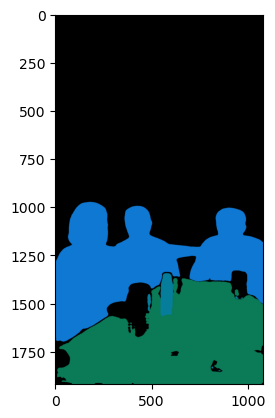

In [64]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")


# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

plt.imshow(r)